In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("proccesed_sentiment_keywords.csv",index_col=0)

In [190]:
quarter_list = ['19_Q4', "20_Q1","20_Q2","20_Q3","20_Q4","21_Q1","21_Q2","21_Q3","21_Q4","22_Q1","22_Q2","22_Q3","22_Q4"]
def sentiment_plotter(keywords, full = True):
    fig, axes = plt.subplots(3,1)
    neg_ax = axes[0]
    neu_ax = axes[1]
    pos_ax = axes[2]

    legend_list = []

    for sub_split in df[df.keyword.str.contains("|".join(keywords))].iterrows():
        legend_list.append(sub_split[1]["keyword"])
        neg_list = []
        neu_list = []
        pos_list = []
        for idx in range(len(sub_split[1][1:12])):
            neg,neu,pos = sub_split[1][1:12][idx].split(" ")
            neg_list.append(float(neg))
            neu_list.append(float(neu))
            pos_list.append(float(pos))

        if full:
            # post
            neg,neu,pos = sub_split[1][13].split(" ")
            neg_list.append(float(neg))
            neu_list.append(float(neu))
            pos_list.append(float(pos))

            # pre
            neg,neu,pos = sub_split[1][12].split(" ")

            neg_list = [float(neg)]+neg_list
            neu_list = [float(neu)]+neu_list
            pos_list = [float(pos)]+pos_list

        neg_ax.plot(neg_list)
        neu_ax.plot(neu_list)
        pos_ax.plot(pos_list)

    if full: 
        neg_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
        neu_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
        pos_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
    else:
        neg_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)
        neu_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)
        pos_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)

    neg_ax.set_title("negative prob")
    neu_ax.set_title("neu prob")
    pos_ax.set_title("positve prob")
    fig.legend(legend_list,loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
    fig.tight_layout()
    
    return 
    

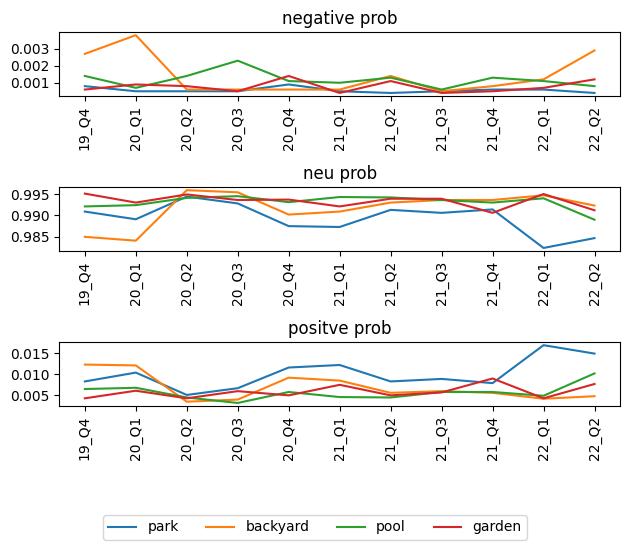

In [184]:
sentiment_plotter(keywords = ['park', 'garden','pool','backyard'],full=False)

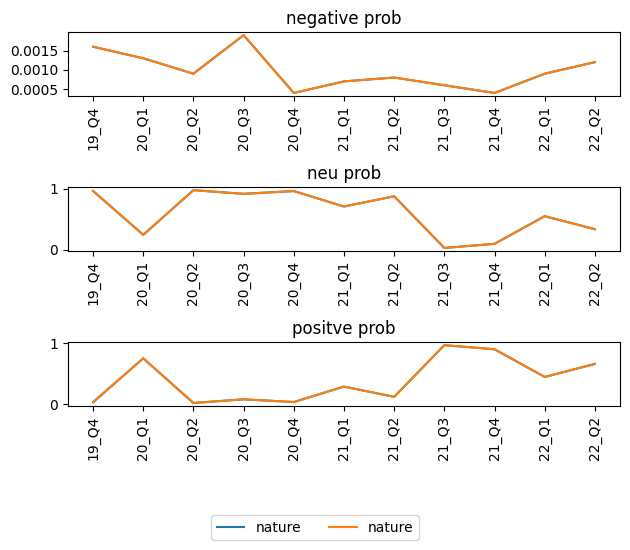

In [185]:
sentiment_plotter(['nature'],full=False)

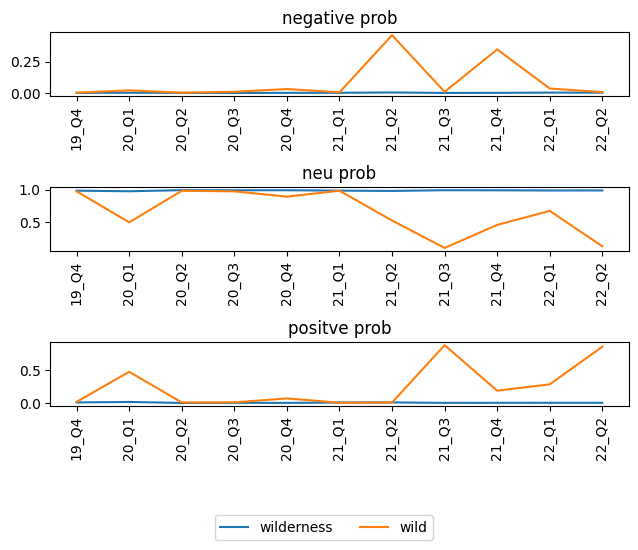

In [186]:
sentiment_plotter(['wild'],full=False)

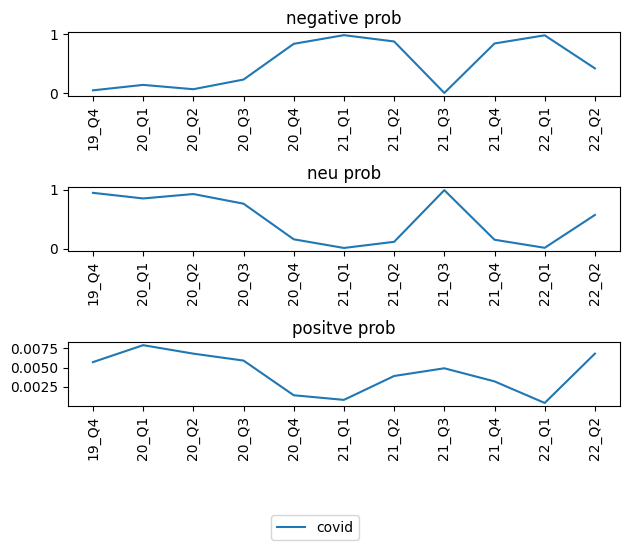

In [187]:
sentiment_plotter(['covid'],full=False)

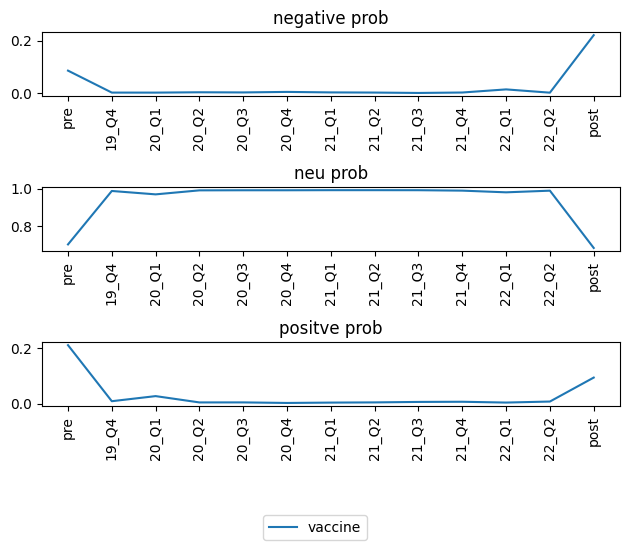

In [189]:
sentiment_plotter(['vaccine'],full=True)